In [125]:
library(forecast)
library(tseries)
library(data.table)
library(xlsx)
library(ggplot2)

In [126]:
library("readxl")
my_data <- read_excel("wholegdp_all_year.xlsx")
drops <- c("X__1")
my_data=my_data[ , !(names(my_data) %in% drops)]
# my_data

get country names

In [127]:
drops <- c("year")
data=my_data[ , !(names(my_data) %in% drops)]
ctr_list=names(data)
# str(ctr_list)

# length(ctr_list)
# str(ctr_list[1])


reverse the year, otherwise we are predicting backwards

In [128]:
my_data$year<-as.numeric(my_data$year)
# str(my_data$year)

# reverse the year, otherwise we are predicting backwards
newdata <- my_data[order(my_data$year),] 

# newdata$year
# str(newdata$year)

We hope to use as many data points (years) as possible but some counties lack data, and some countries 
exerienced very strange pattern in early years

In [129]:
# col='CYM'
# # only two years of GDP are available
# train=subset(newdata, year <= 2008& year>=1960)[ , col]
# train


exclude=NULL
data=subset(newdata, year <= 2008& year>=2000)
colnames(data)[colSums(is.na(data)) > 0]
exclude=colnames(data)[colSums(is.na(data)) > 0]
newdata=newdata[ , !(names(newdata) %in% exclude)]



for_ctr_name=newdata
drops <- c("year")
for_ctr_name=for_ctr_name[ , !(names(for_ctr_name) %in% drops)]
ctr_list=names(for_ctr_name)

[1] "AFG" "ASM" "CYM" "GUM" "IRQ" "MNP" "NCL" "NRU" "PYF" "SOM" "SSD" "STP"
[13] "SYR" "VIR"

In [130]:
# predict from the time we have data

test=subset(newdata, year == 2009)
# test

real=subset(test[,!(names(test) %in% c('year'))])
# real gdp list of 2009


predict = NULL
mod=NULL
start=NULL

len=length(ctr_list)
for (i in 1:len)
{
    m=''
    col=ctr_list[i]
#     print(col)
    train=subset(newdata, year <= 2008& year>=1960)[ , col]
    earliest=1960+colSums(is.na(train))[1]
    start<-c(start,earliest)
    data=subset(newdata, year <= 2008& year>=earliest)[ , col]
    fit <- auto.arima(data)
    fcast <- forecast(fit,h=1)
    modelindex<-arimaorder(fit)
    pre<-as.data.frame(fcast$mean)[1:1,]
    predict <- c(predict, pre)
    for (item in modelindex){
        m=paste(item,m)
    }
    mod<-c(mod,m)
}

df <- as.data.frame(real)
df <- rbind(df,predict)
# real is first row
# predict is second row
# df


df <- rbind(df, df[1, ] - df[2, ])
df <- rbind(df, (df[1, ] - df[2, ])/df[2,])
# df

df <- rbind(df,mod)          
df <- rbind(df,start)          

df

ABW,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,⋯,UZB,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
2498932960.89385,75492384801.3695,12044212903.8168,3650083356.48791,253547358747.447,332976484577.619,8647936747.98704,1217719666.66667,927168310999.853,397594276187.83,⋯,33689223673.2577,674922481.481482,329787628928.472,106014601171.036,610066628.693058,560967765.481746,25130274124.2524,295936485832.635,15328342303.9575,8366794000
2896374700.71796,107907144159.962,14576982827.6937,4178606941.42686,373033098053.098,361558037110.419,14117779727.3544,1450100812.87296,1256905028097.89,454567064967.137,⋯,0,742357455.427627,386204103239.162,102827504806.912,665427791.848261,707746281.058979,32165185239.2572,286769839732.726,20347935945.347,4415702800
-397441739.824112,-32414759358.5921,-2532769923.87686,-528523584.938945,-119485739305.651,-28581552532.8,-5469842979.36737,-232381146.206287,-329736717098.037,-56972788779.3072,⋯,33689223673.2577,-67434973.9461446,-56416474310.6904,3187096364.12386,-55361163.155203,-146778515.577233,-7034911115.0048,9166646099.909,-5019593641.38947,3951091200
-0.137220415482014,-0.300394933170879,-0.173751314233906,-0.12648320178171,-0.320308680192885,-0.0790510778331039,-0.387443570094034,-0.160251717772567,-0.262340200513826,-0.125334176560781,⋯,Inf,-0.0908389529236955,-0.146079427529421,0.0309945901158307,-0.0831963495264218,-0.207388607337665,-0.21871197267096,0.0319651679843754,-0.246688099219091,0.894781958604642
0 1 0,0 2 0,1 2 0,1 2 0,0 2 0,0 1 0,0 2 0,1 2 0,0 2 0,0 2 3,⋯,0 0 0,2 2 0,1 2 0,0 1 0,0 2 2,1 2 0,0 2 0,0 1 0,0 2 1,0 1 0
1994,1985,1984,1970,1975,1962,1990,1977,1960,1960,⋯,1990,1960,1960,1985,1979,1982,1990,1960,1960,1960


In [131]:
data=subset(newdata, year == 2006)
drops <- c("year")
data=data[ , !(names(data) %in% drops)]
# data
df<-rbind(df,data)

data=subset(newdata, year == 2007)
drops <- c("year")
data=data[ , !(names(data) %in% drops)]
df<-rbind(df,data)

data=subset(newdata, year == 2008)
drops <- c("year")
data=data[ , !(names(data) %in% drops)]


df<-rbind(df,data)
# df

df_adding3years=df

df



ABW,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,⋯,UZB,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
2498932960.89385,75492384801.3695,12044212903.8168,3650083356.48791,253547358747.447,332976484577.619,8647936747.98704,1217719666.66667,927168310999.853,397594276187.83,⋯,33689223673.2577,674922481.481482,329787628928.472,106014601171.036,610066628.693058,560967765.481746,25130274124.2524,295936485832.635,15328342303.9575,8366794000
2896374700.71796,107907144159.962,14576982827.6937,4178606941.42686,373033098053.098,361558037110.419,14117779727.3544,1450100812.87296,1256905028097.89,454567064967.137,⋯,0,742357455.427627,386204103239.162,102827504806.912,665427791.848261,707746281.058979,32165185239.2572,286769839732.726,20347935945.347,4415702800
-397441739.824112,-32414759358.5921,-2532769923.87686,-528523584.938945,-119485739305.651,-28581552532.8,-5469842979.36737,-232381146.206287,-329736717098.037,-56972788779.3072,⋯,33689223673.2577,-67434973.9461446,-56416474310.6904,3187096364.12386,-55361163.155203,-146778515.577233,-7034911115.0048,9166646099.909,-5019593641.38947,3951091200
-0.137220415482014,-0.300394933170879,-0.173751314233906,-0.12648320178171,-0.320308680192885,-0.0790510778331039,-0.387443570094034,-0.160251717772567,-0.262340200513826,-0.125334176560781,⋯,Inf,-0.0908389529236955,-0.146079427529421,0.0309945901158307,-0.0831963495264218,-0.207388607337665,-0.21871197267096,0.0319651679843754,-0.246688099219091,0.894781958604642
0 1 0,0 2 0,1 2 0,1 2 0,0 2 0,0 1 0,0 2 0,1 2 0,0 2 0,0 2 3,⋯,0 0 0,2 2 0,1 2 0,0 1 0,0 2 2,1 2 0,0 2 0,0 1 0,0 2 1,0 1 0
1994,1985,1984,1970,1975,1962,1990,1977,1960,1960,⋯,1990,1960,1960,1985,1979,1982,1990,1960,1960,1960
2421474860.3352,41789478661.3096,8992642348.7871,3536632793.87781,222116541865.214,232557260817.308,6384451606.1421,1149025481.48148,747572626534.891,334309371471.584,⋯,17330833852.919,610930044.444444,183477522123.894,66371664817.0436,439376794.094041,508505414.405727,19081722875.3022,271638484826.109,12756858899.2812,5443896500
2623726256.98324,60448921272.2326,10701011896.7708,4010990966.32904,257916133424.098,287530508430.568,9206301700.39619,1302388925.92593,853764622752.61,386458951546.674,⋯,22311393927.8817,651833314.814815,230364012575.687,77414425532.2452,526428309.945088,550967295.278082,21656517484.2538,299415505152.298,14056957976.2648,5291950100
2791960893.85475,84178032716.0971,12881352687.7773,4001201113.22689,315474615738.598,361558037110.419,11662040713.8753,1359733555.55556,1055334825425.25,427611527757.434,⋯,29549438883.8338,695428851.851852,315953388510.678,99130304099.1274,607958616.143415,644143266.155792,26910851361.7555,286769839732.726,17910858637.9048,4415702800


In [154]:
df_before_transpose=df_adding3years
df_after_transpose=transpose(setDT(df_before_transpose))

colnames(df_after_transpose) <- c('real','predict_arima','drop','drop_per_cent','mod','start','gdp2006','gdp2007','gdp2008')
rownames(df_after_transpose) <- ctr_list

# some countries are predicted to be infinit due to predict 0 - drop this in excel later.


df_after_transpose$iso3 <- ctr_list


head(df_after_transpose)

real,predict_arima,drop,drop_per_cent,mod,start,gdp2006,gdp2007,gdp2008,iso3
2498932960.89385,2896374700.71796,-397441739.824112,-0.137220415482014,0 1 0,1994,2421474860.3352,2623726256.98324,2791960893.85475,ABW
75492384801.3695,107907144159.962,-32414759358.5921,-0.300394933170879,0 2 0,1985,41789478661.3096,60448921272.2326,84178032716.0971,AGO
12044212903.8168,14576982827.6937,-2532769923.87686,-0.173751314233906,1 2 0,1984,8992642348.7871,10701011896.7708,12881352687.7773,ALB
3650083356.48791,4178606941.42686,-528523584.938945,-0.12648320178171,1 2 0,1970,3536632793.87781,4010990966.32904,4001201113.22689,AND
253547358747.447,373033098053.098,-119485739305.651,-0.320308680192885,0 2 0,1975,222116541865.214,257916133424.098,315474615738.598,ARE
332976484577.619,361558037110.419,-28581552532.8,-0.0790510778331039,0 1 0,1962,232557260817.308,287530508430.568,361558037110.419,ARG


In [155]:
df_after_transpose$predict_by2006<-as.numeric(df_after_transpose$gdp2008)*as.numeric(df_after_transpose$gdp2007)/as.numeric(df_after_transpose$gdp2006)
df_after_transpose$predict_by2007<-as.numeric(df_after_transpose$gdp2008)*as.numeric(df_after_transpose$gdp2008)/as.numeric(df_after_transpose$gdp2007)

df_pred=df_after_transpose
# df_after_transpose

# df_clean <- subset(df, mod!='0 0 0')
# df_clean<-subset(df,predict!=0)


In [156]:
data=df_pred
# data[data$mod=='0 0 0 ']
nrow(data[data$mod=='0 0 0 '])
data[data$mod=='0 0 0 ']$iso3

[1] 9

[1] "BGR" "ETH" "GEO" "KGZ" "LBR" "MNG" "TJK" "UKR" "UZB"

In [160]:
data=df_pred
# data[data$mod=='0 0 0 ']
nrow(data[data$mod=='0 1 0 '])


data[data$mod=='0 1 0 ']$iso3

[1] 52

[1] "ABW" "ARG" "BDI" "BRA" "BRB" "CAF" "CHE" "CIV" "CMR" "COD" "COM" "CUB"
[13] "DEU" "DMA" "ERI" "FJI" "FSM" "GIN" "GMB" "GRL" "HTI" "IMN" "IRN" "ISL"
[25] "JPN" "KIR" "LBN" "LSO" "MDG" "MHL" "MWI" "NAM" "NER" "NIC" "PLW" "PNG"
[37] "PRY" "PSE" "RWA" "SLE" "SMR" "SRB" "SWE" "SWZ" "TGO" "TLS" "TON" "UGA"
[49] "URY" "VNM" "ZAF" "ZWE"

For ARIMA(0,1,0) and those with no pattern detected, we will keep it flat

In [161]:
data=df_pred
# data[data$mod=='0 0 0 ']
# nrow(data[data$mod=='0 0 0 '])
data[data$mod=='0 0 0 ']$predict_arima<-data[data$mod=='0 0 0 ']$predict_by2007
data[data$mod=='0 1 0 ']$predict_arima<-data[data$mod=='0 1 0 ']$gdp2008


data$drop<-as.numeric(data$predict_arima) - as.numeric(data$real)
data$drop_per_cent<-as.numeric(data$drop)/as.numeric(data$predict_arima)
head(data)

Warning message in `[<-.data.table`(`*tmp*`, data$mod == "0 0 0 ", value = structure(list(:
“Coerced 'double' RHS to 'character' to match the column's type; may have truncated precision. Either change the target column to 'double' first (by creating a new 'double' vector length 194 (nrows of entire table) and assign that; i.e. 'replace' column), or coerce RHS to 'character' (e.g. 1L, NA_[real|integer]_, as.*, etc) to make your intent clear and for speed. Or, set the column type correctly up front when you create the table and stick to it, please.”

real,predict_arima,drop,drop_per_cent,mod,start,gdp2006,gdp2007,gdp2008,iso3,predict_by2006,predict_by2007
2498932960.89385,2791960893.85475,293027933,0.10495417,0 1 0,1994,2421474860.3352,2623726256.98324,2791960893.85475,ABW,3025156786,2970982820
75492384801.3695,107907144159.962,32414759359,0.30039493,0 2 0,1985,41789478661.3096,60448921272.2326,84178032716.0971,AGO,121764411414,117221962656
12044212903.8168,14576982827.6937,2532769924,0.17375131,1 2 0,1984,8992642348.7871,10701011896.7708,12881352687.7773,ALB,15328476660,15505939874
3650083356.48791,4178606941.42686,528523585,0.12648320,1 2 0,1970,3536632793.87781,4010990966.32904,4001201113.22689,AND,4537870470,3991435155
253547358747.447,373033098053.098,119485739306,0.32030868,0 2 0,1975,222116541865.214,257916133424.098,315474615738.598,ARE,366321177169,385878276997
332976484577.619,361558037110.419,28581552533,0.07905108,0 1 0,1962,232557260817.308,287530508430.568,361558037110.419,ARG,447025243900,454644673752


In [162]:
output=data
write.xlsx(output, "prediction_gdp_earliest-2008for2009.xlsx")

Example on a single country


Mexico  

ARIMA(2,2,1)  
$\Delta y_t=\alpha_1*\Delta y_{t-1}+\alpha_2*\Delta y_{t-2}+\beta_1*\epsilon_{t-1}$  
where $\Delta y_t = (y_t-y_{t-1}) - (y_{t-1}-y_{t-2})$, the first difference of first differences.

Series: data 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 2.376e+20:  log likelihood=-472.67
AIC=947.34   AICc=947.58   BIC=948.29

real,predict_arima,drop,drop_per_cent,mod,start,gdp2006,gdp2007,gdp2008,iso3,predict_by2006,predict_by2007
33689223673.2577,0,33689223673.2577,Inf,0 0 0,1990,17330833852.919,22311393927.8817,29549438883.8338,UZB,38041399328,39135579837


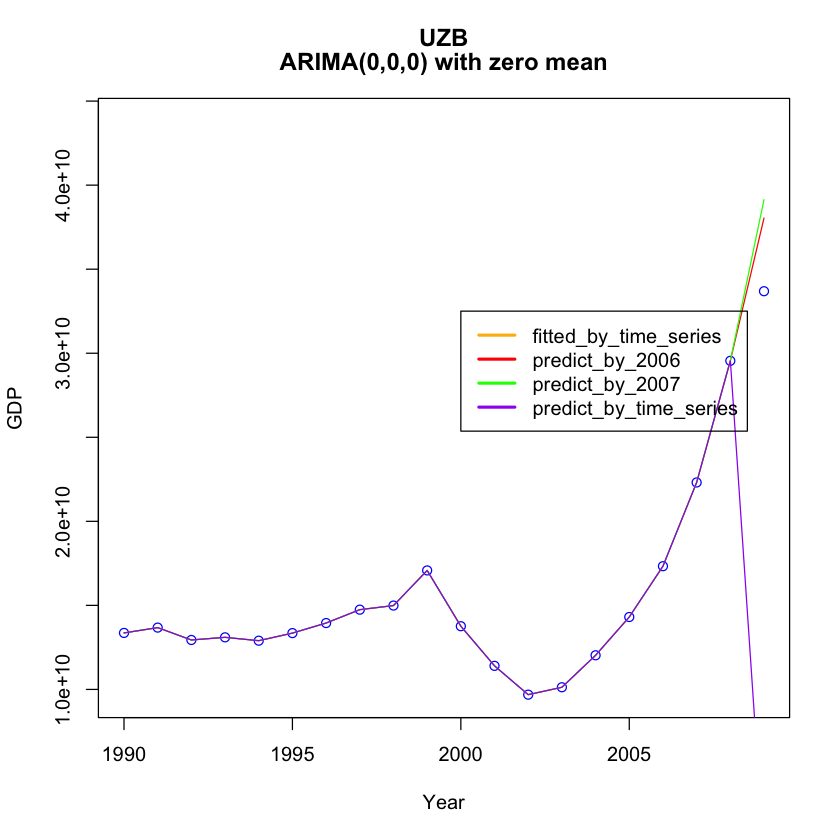

In [146]:
ctr_name='UZB'


# 'BGR' 'ETH' 'GEO' 'KGZ' 'LBR' 'MNG' 'TJK' 'UKR' 'UZB'

# 'ABW' 'ARG' 'BDI' 'BRA' 'BRB' 'CAF' 'CHE' 'CIV' 'CMR' 'COD' 
# 'COM' 'CUB' 'DEU' 'DMA' 'ERI' 'FJI' 'FSM' 'GIN' 'GMB' 'GRL'
# 'HTI' 'IMN' 'IRN' 'ISL' 'JPN' 'KIR' 'LBN' 'LSO' 'MDG' 'MHL' 'MWI'
# 'NAM' 'NER' 'NIC' 'PLW' 'PNG' 'PRY' 'PSE' 'RWA' 'SLE' 'SMR' 'SRB' 
# 'SWE' 'SWZ' 'TGO' 'TLS' 'TON' 'UGA' 'URY' 'VNM' 'ZAF' 'ZWE'

start_year=as.numeric(df_pred[iso3==ctr_name]$start)
data=subset(newdata, year <= 2008&year>=start_year)[[ctr_name]]

fit <- auto.arima(data)
n=1
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

fit

# pre

df_pred[iso3==ctr_name]


plot_name= cbind(toString(ctr_name), toString(fit))
y=subset(newdata, year <= 2009&year>=start_year)[[ctr_name]]
x=subset(newdata, year <= 2009&year>=start_year)$year
plot(x,y,col="blue",main=plot_name,ylim=c(min(y),max(y)*1.3),xlab = "Year",ylab = "GDP")




y=c(fcast$fitted,pre)
x=subset(newdata, year <= 2009&year>=start_year)$year
lines(x,y,col="darkgoldenrod1")



real_before=subset(newdata, year <= 2008&year>=start_year)[[ctr_name]]
# real_before
pre_by_growth2006=subset(output,iso3==ctr_name)$predict_by2006
# pre_by_growth
y=c(real_before,pre_by_growth2006)
# y
x=subset(newdata, year <= 2009&year>=start_year)$year
lines(x,y,col="red")


real_before=subset(newdata, year <= 2008&year>=start_year)[[ctr_name]]
# real_before
pre_by_growth2007=subset(output,iso3==ctr_name)$predict_by2007
# pre_by_growth
y=c(real_before,pre_by_growth2007)
# y
x=subset(newdata, year <= 2009&year>=start_year)$year
lines(x,y,col="green")



real_before=subset(newdata, year <= 2008&year>=start_year)[[ctr_name]]
y=c(real_before,pre)
x=subset(newdata, year <= 2009&year>=start_year)$year
lines(x,y,col="purple")


legend(start_year+10,max(y)*1.1, # places a legend at the appropriate place 
       c("fitted_by_time_series","predict_by_2006","predict_by_2007","predict_by_time_series"),
       col=c("darkgoldenrod1","red", "green","purple"),
       # puts text in the legend 
       lty=c(1,1,1,1), # gives the legend appropriate symbols (lines)
       lwd=c(2.5,2.5,2.5,2.5)) # gives the legend lines the correct color and width



In [101]:
# subset(newdata, year <= 2008&year>=start_year)[[ctr_name]]

# should not start from 0!

[1]   4187777711   4485777644   5377333333   7184853348   9664157499
 [6]  14947391140  45412957746  46773368206  64005665722  74188249979
[11]  80265619485 111859676268 164541738059 184291796009 153239017560
[16] 129171635311 119624858116 103897846494  86961922765  85695861148
[21]  88256074766  95344459279 117630271802 132223268485 137087876663
[26] 132967901424 135174886501 143343036351 158662398751 165963557420
[31] 146775498093 161716960000 189514926223 184137469725 189605920241
[36] 215807655244 258742133333 328459608764 376900133511 415964509673
[41] 519796800000

In [53]:
fcast[2]

$model
Series: data 
ARIMA(1,2,1) 

Coefficients:
         ar1      ma1
      0.3856  -0.7966
s.e.  0.2192   0.1317

sigma^2 estimated as 149728:  log likelihood=-264.77
AIC=535.54   AICc=536.29   BIC=540.29


In [50]:
fcast[9]

$fitted
Time Series:
Start = 1 
End = 38 
Frequency = 1 
 [1]  5244.537  5629.641  6009.521  6574.287  7300.314  7739.522  8366.849
 [8]  9293.664 10218.681 11510.126 12653.440 13465.215 15158.299 15091.434
[15] 16570.693 18431.949 19365.202 20048.308 21098.871 22712.351 24216.199
[22] 25038.005 25135.811 26541.892 27453.441 28962.012 29812.893 31259.045
[29] 32911.511 34246.350 36108.101 38067.151 38341.943 39225.056 41066.753
[36] 43768.084 46318.557 48372.730


In [56]:
fcast[4]

$mean
Time Series:
Start = 39 
End = 40 
Frequency = 1 
[1] 49739.31 51437.64


In [54]:
fcast[10]

$residuals
Time Series:
Start = 1 
End = 38 
Frequency = 1 
 [1]    2.346477   -6.197402  100.404682  167.045620  -57.872549   80.543462
 [7]  244.553028  177.642326  368.604648  185.428623  -55.772921  527.951938
[13] -719.322606  469.992658  563.593157 -162.527103 -250.149261   52.550810
[19]  384.362116  210.086219 -261.719530 -632.840257  357.140998  -77.039461
[25]  323.194606 -179.837331  255.337784  313.644800   37.686330  374.579250
[31]  341.753659 -793.533046 -175.905551  452.142370  855.056415  539.836445
[37]  118.510160 -311.192170


In [68]:
as.data.frame(fcast$mean)




x
49739.31
51437.64


In [69]:
as.data.frame(fcast$mean)[2:2,]

[1] 51437.64

Warning message in year == c(2007, 2008):
“longer object length is not a multiple of shorter object length”

year,USA,CHN


In [30]:
train[year<=2007]

data=train$USA


data=newdata[c('year','USA','CHN')]

# data[data$year <= 2007] 


# train

ERROR: Error in check_names_df(i, x): object 'year' not found


In [ ]:
pred <- function(data, startDate, endDate, p, n) {
    fit <- auto.arima(data)
    # fit2 = arima(deseasonal_cnt, order=c(1,1,7))
    fcast <- forecast(fit,h=n)
    # return (data)
    result<-as.data.frame(do.call(rbind, fcast))
    return (result)
}

In [4]:
# # # Get any arguments
# # arguments <- commandArgs(trailingOnly=TRUE)
# # a <- arguments[1]
 
# # Define a function that can issue custom warnings and errors
# # Use '.call=FALSE' to remove the function call from the message
# myFunc <- function(a) {
#   if (a == 'warning') {
#   return_value <- 'warning return'
#   warning("custom warning message", call.=FALSE)
# } else if (a == 'error-A') {
#   return_value <- 'error return'
#   stop("custom error message A", call.=FALSE)
# } else if (a == 'error-B') {
#   return_value <- 'error return'
#   stop("custom error message B", call.=FALSE)
# } else {
#   return_value = log(a)
# #       if the argument can be run without errors
# }
#   return(return_value)
# }
 
# # Turn warnings into errors so they can be trapped
# options(warn = 2)
# result <- try(myFunc(-1), silent=TRUE)

# print(result)

Warning message in log(a):
“NaNs produced”

[1] NaN


In [ ]:
ts1970 <- function(x) {
  x^2 
}


ari <- 1
tryCatch(print("passes"), error = ts1970(e) print(vari), finally=print("finished"))